# MNIST Example for MLP with momentum and batchnorm

The purpose of this demo is to help you learn about neural networks and explore how changing the architecture of a neural network impacts the performance of the network.  

You are free to change model acrhitecture, add depth or select any other hidden layers sizes.

If you have any suggestions or find errors, please, don't be hesitate to text me up @ a.sadenov@gmail.com


In [36]:
import mlp
import activations as ac
from random import randint
import mnist
import numpy as np
import time
from matplotlib import pyplot as plt
import os
import glob


#### Initializing parameters

In [37]:
np.random.seed(11785)

#initialize neural parameters
learning_rate = 0.008
momentum = 0.856
num_bn_layers= 1
mini_batch_size = 10
epochs = 30

# random weight init
def weight_init(x, y):
    return np.random.randn(x, y)

# zero bias init
def bias_init(x):
    return np.zeros((1, x))

# initialize training, validation and testing data
train, val, test = mnist.load_mnist()

#### Creating multi-layer perceptron class

In [38]:
net = mlp.MLP(784, 10, [64, 32], [ac.Sigmoid(), ac.Sigmoid(), ac.Sigmoid()], weight_init, bias_init, ac.SoftmaxCrossEntropy(), learning_rate,
          momentum, num_bn_layers)


#### Let's view random MNIST data
If MNIST dataset doesn't exist in "data" folder, it will be downloaded from 
http://deeplearning.net/data/mnist/mnist.pkl.gz

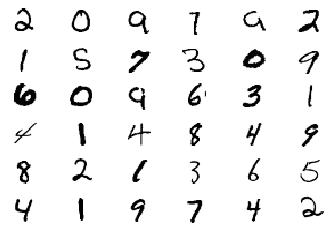

In [39]:
m = train[0].shape[0]
for i in range(36):
    ax = plt.subplot(6, 6, i+1)
    ax.axis('off')
    x_draw = train[0][randint(0, m)]
    x_draw = np.reshape(x_draw, (-1, 28))
    
    plt.imshow(x_draw, cmap='Greys')

#### Training MLP

In [40]:
%%time
net.fit(train, val, epochs, mini_batch_size)

Epoch 1, accuracy 4.81 %.
Epoch 2, accuracy 6.68 %.
Epoch 3, accuracy 72.52 %.
Epoch 4, accuracy 78.99000000000001 %.
Epoch 5, accuracy 81.76 %.
Epoch 6, accuracy 83.3 %.
Epoch 7, accuracy 84.58 %.
Epoch 8, accuracy 85.46000000000001 %.
Epoch 9, accuracy 86.33 %.
Epoch 10, accuracy 86.92 %.
Epoch 11, accuracy 87.51 %.
Epoch 12, accuracy 87.79 %.
Epoch 13, accuracy 88.19 %.
Epoch 14, accuracy 88.32 %.
Epoch 15, accuracy 88.52 %.
Epoch 16, accuracy 88.66000000000001 %.
Epoch 17, accuracy 88.77000000000001 %.
Epoch 18, accuracy 89.05999999999999 %.
Epoch 19, accuracy 89.19 %.
Epoch 20, accuracy 89.42 %.
Epoch 21, accuracy 89.52 %.
Epoch 22, accuracy 89.82 %.
Epoch 23, accuracy 90.03 %.
Epoch 24, accuracy 90.25 %.
Epoch 25, accuracy 90.38000000000001 %.
Epoch 26, accuracy 90.53999999999999 %.
Epoch 27, accuracy 90.7 %.
Epoch 28, accuracy 90.82000000000001 %.
Epoch 29, accuracy 90.91 %.
Epoch 30, accuracy 91.02 %.
CPU times: user 4min 47s, sys: 5.59 s, total: 4min 52s
Wall time: 2min 30s


#### Training loss

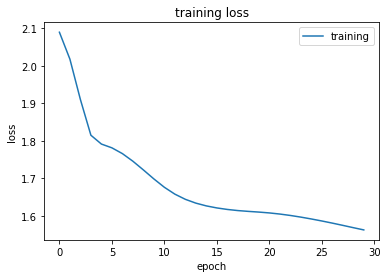

In [41]:
plt.plot(net.training_loss)
plt.title('training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training'], loc='best')
plt.show()


#### Validation accuracy curve

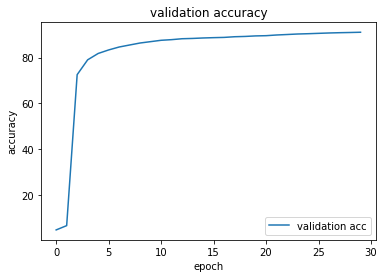

In [42]:
plt.plot(net.validation_acc)
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation acc'], loc='best')
plt.show()

In [43]:
#save the model
net.save()

#### Loading last trained model

In [44]:
path = os.path.join(os.curdir, 'models/*')

files = sorted(
    glob.iglob(path), key=os.path.getctime, reverse=True) 

#load latest model
print(files[0])
net.load(files[0])


./models/1562214586.449026_nn_model.pkl


#### Let's check accuracy according to the test samples

In [45]:
#testing neural network
test_acc = net.validate(test) * 100.0
print("Test Accuracy: " + str(test_acc) + "%")


Test Accuracy: 90.58%
